<a href="https://colab.research.google.com/github/soyebganja/NLP-Practice-Projects/blob/main/4_tokenization/spacy_tokenizer_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spacy Tokenization Tutorial

---



In [18]:
import spacy

### Create blank language object and tokenize words in a sentence

In [19]:
nlp = spacy.blank("en")

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


### Creating blank language object gives a tokenizer and an empty pipeline.

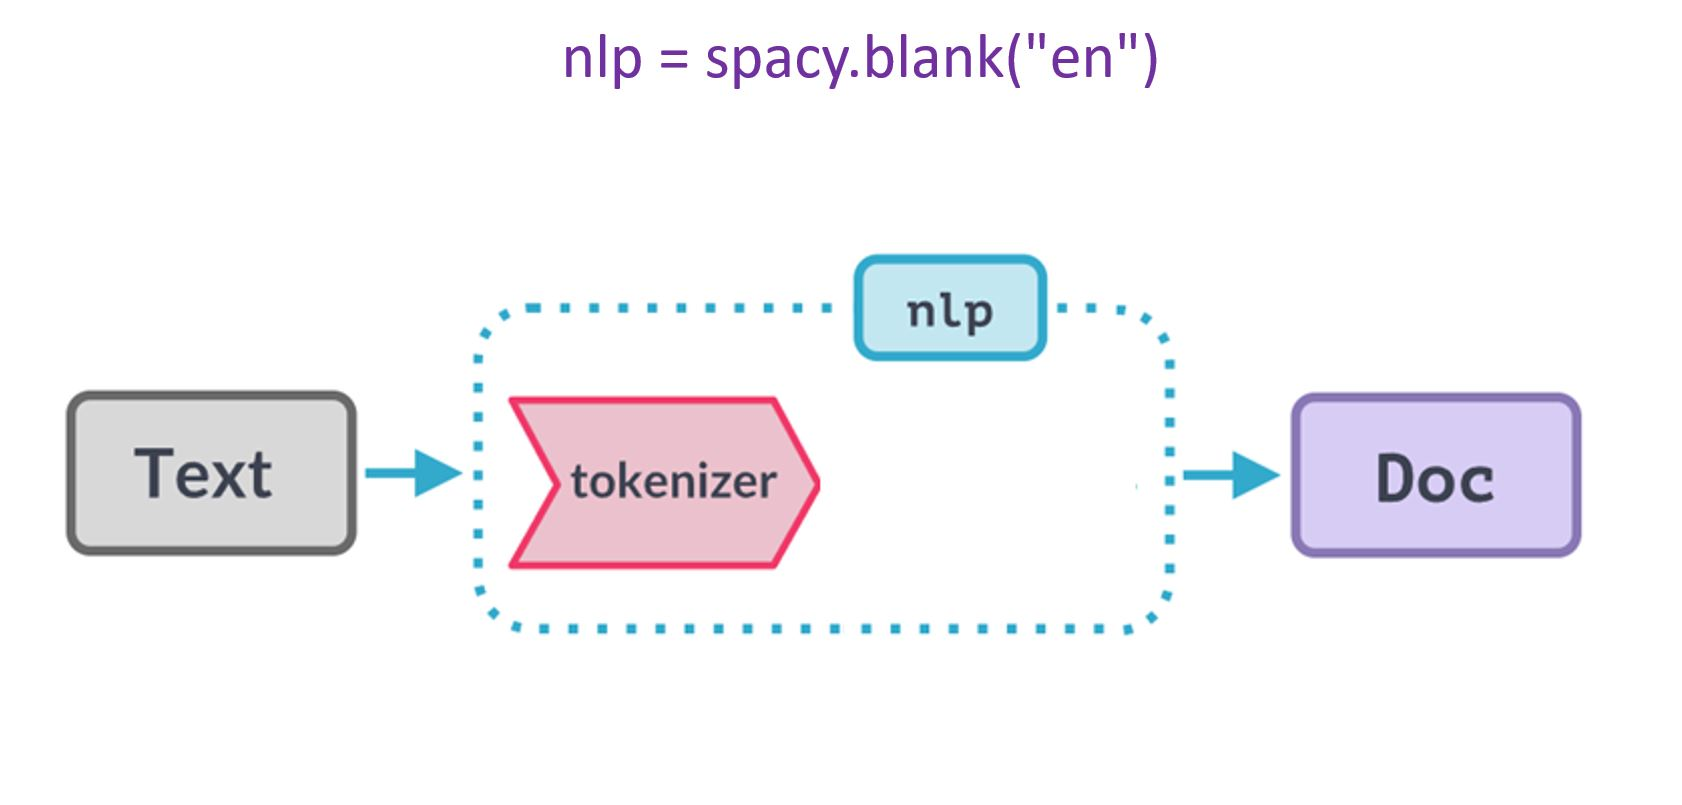


### Exercise

(1) Think stats is a free book to study statistics (https://greenteapress.com/thinkstats2/thinkstats2.pdf)

This book has references to many websites from where you can download free datasets. You are an NLP engineer working for some company and you want to collect all dataset websites from this book. To keep exercise simple you are given a paragraph from this book and you want to grab all urls from this paragraph using spacy


In [15]:
import spacy
import re
from spacy.tokens import Span
from spacy.language import Language

# Define a regular expression pattern for URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Load a pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

# Define a custom component for URL detection
@Language.component("url_detector")
def url_component(doc):
    # Find matches using the regular expression
    matches = [(match.start(), match.end()) for match in re.finditer(url_pattern, doc.text)]
    spans = []
    for start, end in matches:
        span = doc.char_span(start, end, label="URL")
        if span is not None:
            spans.append(span)
    # Ensure spans do not overlap with existing spans
    doc.ents = [ent for ent in doc.ents if not any(ent.start < span.end and span.start < ent.end for span in spans)]
    doc.ents = list(doc.ents) + spans
    return doc

# Register the component with the pipeline
nlp.add_pipe("url_detector", after="ner")

# Example text
text = '''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/,
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# Process the text with spaCy
doc = nlp(text)

# Print detected URLs
for ent in doc.ents:
    if ent.label_ == "URL":
        print(f"Detected URL: {ent.text}")


Detected URL: http://www.data.gov/,
Detected URL: http://www.science.
Detected URL: http://data.gov.uk/.
Detected URL: http://www3.norc.org/gss+website/,
Detected URL: http://www.europeansocialsurvey.org/.


(2) Extract all money transaction from below sentence along with currency. Output should be,

two $

500 €


In [17]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection
doc = nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i + 1].is_currency:
        print(token.text, doc[token.i + 1].text)

two $
500 €
